# Imports

In [1]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import plotly.express    as px
import matplotlib.pyplot as plt

from tabulate           import tabulate
from geopy.geocoders    import Nominatim


## Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
        
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = (20,15)
    plt.rcParams['font.size'] = 25
    
    #display( HTML( '<style>.container { width:100% !important; }</style>') )
    #pd.options.display.max_columns = None
    #pd.options.display.max_rows = None
    #pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    sns.set_theme(style = 'darkgrid', font_scale = 2)
    sns.set_style("darkgrid")


In [3]:
jupyter_settings()

## Loading Data

In [4]:
df_raw = pd.read_csv(r'../datasets/raw/kc_house_data.csv')

# Data Description

In [12]:
df1=df_raw.copy()

## Rename Columns

In [13]:
# checking columns names
df1.columns # nothing to rename

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

## Data Dimension

In [14]:
print('Number of rows: {}' .format (df1.shape[0]))
print('Number of columns: {}' .format (df1.shape[1]))

Number of rows: 21613
Number of columns: 21


## Data Types

In [15]:
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## Check NA

In [17]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Fill out NA

## Change Variables Types

In [18]:
# changing 'date' type from OBJECT to DATE

# checking DATES types
print(df1[['date','yr_built','yr_renovated']].head(),'\n')
print(df1[['date','yr_built','yr_renovated']].dtypes)

# changing dtypes
df1['date']         = pd.to_datetime(df1['date'],         format='%Y-%m-%d')
# df1['yr_built']     = pd.to_datetime(df1['yr_built'],     format='%Y-%m-%d')
# df1['yr_renovated'] = pd.to_datetime(df1['yr_renovated'], format='%Y-%m-%d')

# checking DATES types
print("")
print(df1[['date','yr_built','yr_renovated']].dtypes)
df1[['date','yr_built','yr_renovated']].head()


# id                 int64
# date              object
# price            float64
# bedrooms           int64
# bathrooms        float64
# sqft_living        int64
# sqft_lot           int64
# floors           float64
# waterfront         int64
# view               int64
# condition          int64
# grade              int64
# sqft_above         int64
# sqft_basement      int64
# yr_built           int64
# yr_renovated       int64
# zipcode            int64
# lat              float64
# long             float64
# sqft_living15      int64
# sqft_lot15         int64
# dtype: object

              date  yr_built  yr_renovated
0  20141013T000000      1955             0
1  20141209T000000      1951          1991
2  20150225T000000      1933             0
3  20141209T000000      1965             0
4  20150218T000000      1987             0 

date            object
yr_built         int64
yr_renovated     int64
dtype: object

date            datetime64[ns]
yr_built                 int64
yr_renovated             int64
dtype: object


,date,yr_built,yr_renovated
0,2014-10-13,1955,0
1,2014-12-09,1951,1991
2,2015-02-25,1933,0
3,2014-12-09,1965,0
4,2015-02-18,1987,0


## Descriptive Statistical

In [21]:
num_df1 = df1.select_dtypes(include=['int64','float64'])
cat_df1 = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

### Numerical Attributes

In [22]:
num_df1.shape

(21613, 20)

In [23]:
# central tendendy - mean, median
ct1 = pd.DataFrame(num_df1.apply(np.mean)).T
ct2 = pd.DataFrame(num_df1.apply(np.median)).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame(num_df1.apply(np.std)).T
d2 = pd.DataFrame(num_df1.apply(min)).T
d3 = pd.DataFrame(num_df1.apply(max)).T
d4 = pd.DataFrame(num_df1.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame(num_df1.apply(lambda x: x.skew())).T
d6 = pd.DataFrame(num_df1.apply(lambda x: x.kurtosis)).T

# concatenate 
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range','mean','median','std','skew','kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.0,9900000190.0,9899000088.0,4580301520.864988,3904930410.0,2876499023.427783,0.243329,<bound method NDFrame._add_numeric_operations....
1,price,75000.0,7700000.0,7625000.0,540088.141767,450000.0,367118.703181,4.024069,<bound method NDFrame._add_numeric_operations....
2,bedrooms,0.0,33.0,33.0,3.370842,3.0,0.93004,1.9743,<bound method NDFrame._add_numeric_operations....
3,bathrooms,0.0,8.0,8.0,2.114757,2.25,0.770145,0.511108,<bound method NDFrame._add_numeric_operations....
4,sqft_living,290.0,13540.0,13250.0,2079.899736,1910.0,918.419649,1.471555,<bound method NDFrame._add_numeric_operations....
5,sqft_lot,520.0,1651359.0,1650839.0,15106.967566,7618.0,41419.553273,13.060019,<bound method NDFrame._add_numeric_operations....
6,floors,1.0,3.5,2.5,1.494309,1.5,0.539976,0.616177,<bound method NDFrame._add_numeric_operations....
7,waterfront,0.0,1.0,1.0,0.007542,0.0,0.086515,11.385108,<bound method NDFrame._add_numeric_operations....
8,view,0.0,4.0,4.0,0.234303,0.0,0.7663,3.39575,<bound method NDFrame._add_numeric_operations....
9,condition,1.0,5.0,4.0,3.40943,3.0,0.650728,1.032805,<bound method NDFrame._add_numeric_operations....


### Categorical Attributes

In [24]:
cat_df1.shape # no attributes

(21613, 0)

# Variable Filtering 

In [25]:
df2=df1.copy()

In [26]:
df2 = df2.drop (['view','condition', 'grade', 'sqft_living15','sqft_lot15'], axis=1)


# view          	An index from 0 to 4 of how good the view of the property was
# condition     	An index from 1 to 5 on the condition of the apartment
# grade         	An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

# sqft_living15 	The square footage of interior housing living space for the nearest 15 neighbors
# sqft_lot15    	The square footage of the land lots of the nearest 15 neighbors

In [27]:
# checking properties 'sqft_living' by number of 'bedrooms'
print(df2[['bedrooms','sqft_living']].groupby(['bedrooms']).mean().sort_values('sqft_living', ascending=True))
print(df2[['id','bedrooms']].groupby(['bedrooms']).count(),'\n')

# droping properties with bedrooms equal 0, 11 or 33 (understanding as outliers)
df2 = df2[ (df2['bedrooms']!=0) & (df2['bedrooms']!=11) & (df2['bedrooms']!=33) ]

          sqft_living
bedrooms             
1          884.613065
2         1239.752899
33        1620.000000
0         1707.846154
3         1805.837235
4         2554.649666
11        3000.000000
5         3047.545284
6         3284.341912
10        3706.666667
9         3775.000000
8         3800.000000
7         3974.210526
            id
bedrooms      
0           13
1          199
2         2760
3         9824
4         6882
5         1601
6          272
7           38
8           13
9            6
10           3
11           1
33           1 



# Feature Engineering

In [28]:
df3 = df2.copy()

In [29]:
df3.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
dtype: object

In [30]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,id,1000102.0,9900000190.0,9899000088.0,4580301520.864988,3904930410.0,2876499023.427783,0.243329,<bound method NDFrame._add_numeric_operations....
1,price,75000.0,7700000.0,7625000.0,540088.141767,450000.0,367118.703181,4.024069,<bound method NDFrame._add_numeric_operations....
2,bedrooms,0.0,33.0,33.0,3.370842,3.0,0.93004,1.9743,<bound method NDFrame._add_numeric_operations....
3,bathrooms,0.0,8.0,8.0,2.114757,2.25,0.770145,0.511108,<bound method NDFrame._add_numeric_operations....
4,sqft_living,290.0,13540.0,13250.0,2079.899736,1910.0,918.419649,1.471555,<bound method NDFrame._add_numeric_operations....
5,sqft_lot,520.0,1651359.0,1650839.0,15106.967566,7618.0,41419.553273,13.060019,<bound method NDFrame._add_numeric_operations....
6,floors,1.0,3.5,2.5,1.494309,1.5,0.539976,0.616177,<bound method NDFrame._add_numeric_operations....
7,waterfront,0.0,1.0,1.0,0.007542,0.0,0.086515,11.385108,<bound method NDFrame._add_numeric_operations....
8,view,0.0,4.0,4.0,0.234303,0.0,0.7663,3.39575,<bound method NDFrame._add_numeric_operations....
9,condition,1.0,5.0,4.0,3.40943,3.0,0.650728,1.032805,<bound method NDFrame._add_numeric_operations....


## Mind Map Hypothesis

## Creating Hypothesis

## Feature Engineering

In [309]:
# mean price by zipcode

In [310]:
# decision: 1 = buy, 0 = hold

In [311]:
# sale price suggestion

In [312]:
# expected profit

# EDA

In [31]:
df4=df3.copy()

In [32]:
num_df4 = df4.select_dtypes(include=['int64','float64'])
cat_df4 = df4.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

## Univariate Analysis

### Response Variable

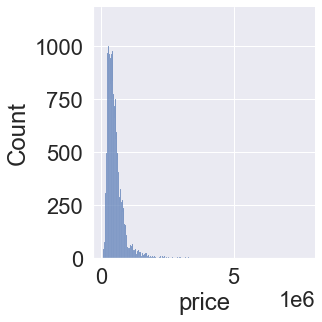

In [33]:
sns.displot(df4['price'], legend=True);

### Numerical Variables

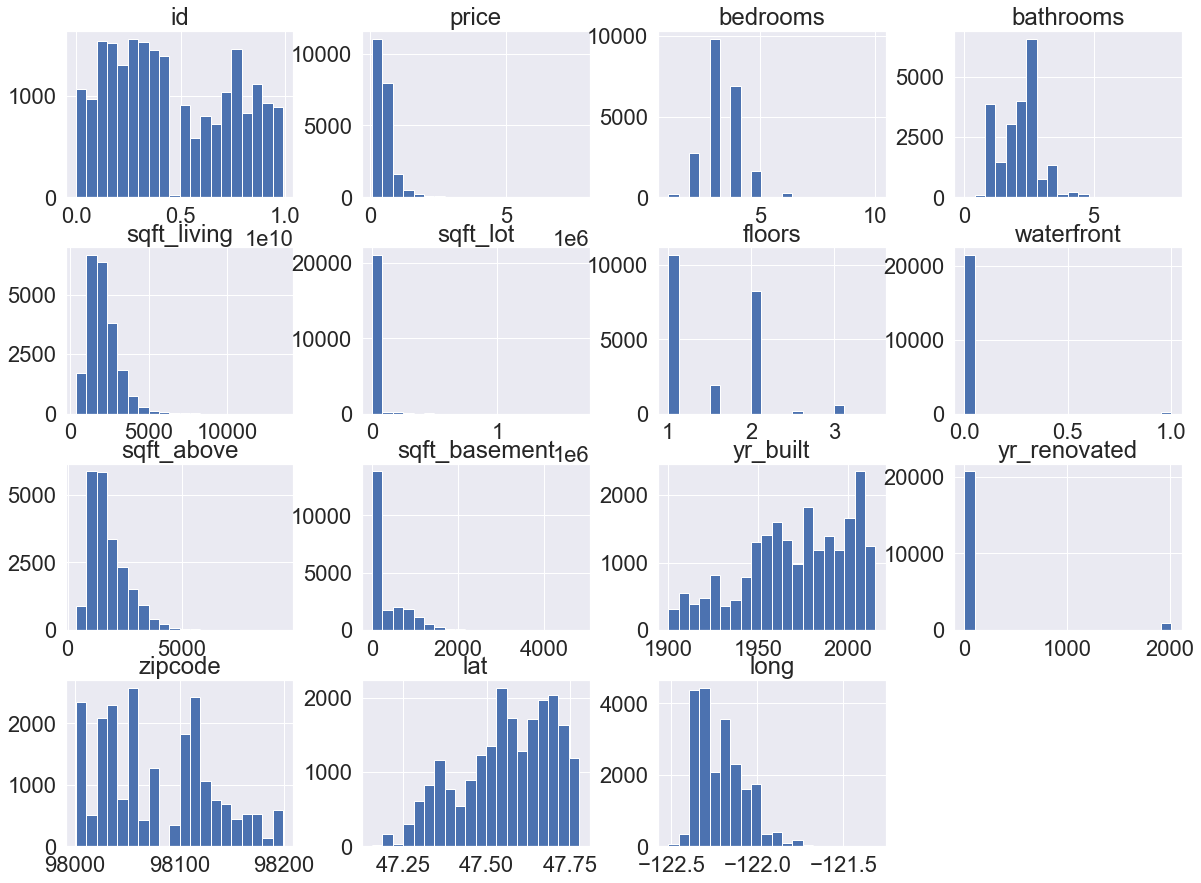

In [34]:
num_df4.hist(bins=20);

### Categorical Variables

In [35]:
cat_df4.shape

(21598, 0)

## <font color='red'> Bivariate Analysis

In [36]:
print('Hypothesis Resume \n\n')
tab = [ ['Hypothesis', 'Conclusion', 'Relevance'],
        ['H1','False','Low'],
        ['H2','False','Medium'],
        ['H3','False','Medium'],
        ['H4','False','Low'],
        ['H5','False','Low'],
        ['H6','False','Low'],
        ['H7','False','Low'],
        ['H8','False','Low'],
        ['H9','False','High'],
        ['H10','True','High'],
        ['H11','True','High'],
        ['H12','True','High'],
      ]

print(tabulate(tab, headers = 'firstrow'))

Hypothesis Resume 


Hypothesis    Conclusion    Relevance
------------  ------------  -----------
H1            False         Low
H2            False         Medium
H3            False         Medium
H4            False         Low
H5            False         Low
H6            False         Low
H7            False         Low
H8            False         Low
H9            False         High
H10           True          High
H11           True          High
H12           True          High


### H1 

## Multivatiate Analysis

### Numerical Attributes

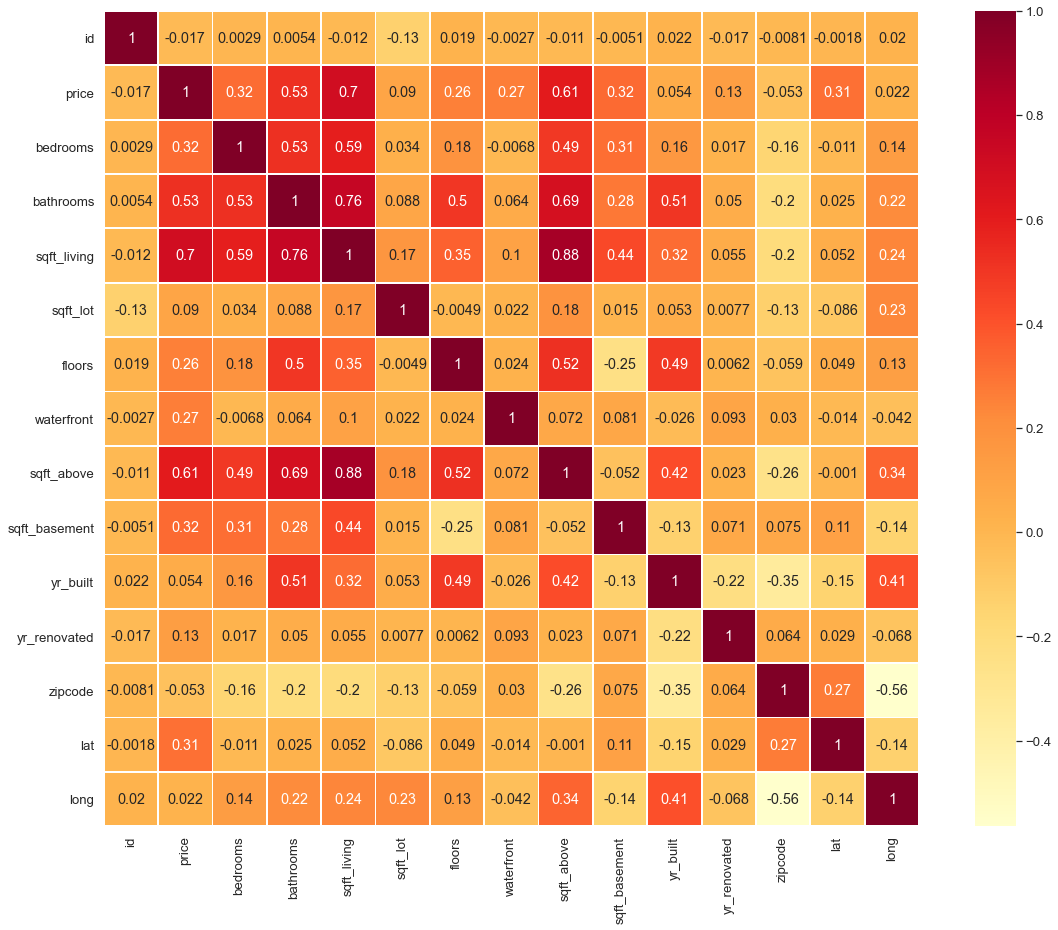

In [37]:
correlation = num_df4.corr(method='pearson')
sns.set(font_scale=1.2)
sns.heatmap(correlation, cmap='YlOrRd', annot=True, 
            annot_kws= {'fontsize':'medium'},
            linewidths=0.8, square=True );

### Categorical Attributes

In [38]:
cat_df4.shape

(21598, 0)

# Conclusion and Visualization

In [39]:
df5=df4.copy()

In [40]:
df5.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
dtype: object

In [ ]:

# ======== Quais os imóveis que a House Rocket deveria comprar e por qual preço?
#          tabela / Relatório com sugestão de compra com valor recomendados
# Agrupar dados por região
# Dentro de cada região, encontrar a mediana do preço de imóveis
# Sugerir que imóveis que estão abaixo do preço mediano de cada região e que estejam em boas condições sejam comprados
# 			Exemplo:
# 			id | zipcode | preço do imovel | preço da mediana | condição | status s/n




# ======== Uma vez comprado, qual o melhor momento para vendê-lo e por qual preço?
#          tabela / Relatório com as sugestões de venda com valor recomendado
# Agrupar dados por região e por sazonalidade (summer, winter)
# Dentro de cada região e sazonalidade, calcular a mediana do preço
# Condição de venda:
# 				- se o preço da compra for maior que a mediana da região + sazonalidade, o preço da venda será igual a compra + 10%,
# - se o preço da compra for menor que a mediana da região + sazonalidade, o preço da venda será igual a compra + 30%
# Exemplo:
# 		id | zipcode | season / pç do imovel | pç da mediana | pç compra / pç venda / lucro




